## Part 1: Preprocessing

In [26]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras import layers

#  Import and read the attrition data
attrition_df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m19/lms/datasets/attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,94,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,61,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,92,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,56,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,40,3,...,3,4,1,6,3,3,2,2,2,2


In [27]:
# How many rows?
attrition_df.shape

(1470, 27)

In [28]:
# Determine the number of unique values in each column.
attrition_df.nunique()

Age                         43
Attrition                    2
BusinessTravel               3
Department                   3
DistanceFromHome            29
Education                    5
EducationField               6
EnvironmentSatisfaction      4
HourlyRate                  71
JobInvolvement               4
JobLevel                     5
JobRole                      9
JobSatisfaction              4
MaritalStatus                3
NumCompaniesWorked          10
OverTime                     2
PercentSalaryHike           15
PerformanceRating            2
RelationshipSatisfaction     4
StockOptionLevel             4
TotalWorkingYears           40
TrainingTimesLastYear        7
WorkLifeBalance              4
YearsAtCompany              37
YearsInCurrentRole          19
YearsSinceLastPromotion     16
YearsWithCurrManager        18
dtype: int64

In [29]:
# Are there any null values?
has_nulls = attrition_df.isnull().values.any()
print(f"Are there any null values?   {has_nulls}")


Are there any null values?   False


In [30]:
# Let's check the data types
attrition_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [31]:
# I also want to check for outliers, let's do that too.
numeric_columns = attrition_df.select_dtypes(include=['number']).columns

for column in numeric_columns:
    Q1 = attrition_df[column].quantile(0.25)
    Q3 = attrition_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = attrition_df[(attrition_df[column] < lower_bound) | (attrition_df[column] > upper_bound)][column]
    
    if not outliers.empty:
        print(f"Column: {column}")
        print(f"Outlier Min / Max: {outliers.min()} / {outliers.max()}")
        print("------------------------------------")


Column: NumCompaniesWorked
Outlier Min / Max: 9 / 9
------------------------------------
Column: PerformanceRating
Outlier Min / Max: 4 / 4
------------------------------------
Column: StockOptionLevel
Outlier Min / Max: 3 / 3
------------------------------------
Column: TotalWorkingYears
Outlier Min / Max: 29 / 40
------------------------------------
Column: TrainingTimesLastYear
Outlier Min / Max: 0 / 6
------------------------------------
Column: YearsAtCompany
Outlier Min / Max: 19 / 40
------------------------------------
Column: YearsInCurrentRole
Outlier Min / Max: 15 / 18
------------------------------------
Column: YearsSinceLastPromotion
Outlier Min / Max: 8 / 15
------------------------------------
Column: YearsWithCurrManager
Outlier Min / Max: 15 / 17
------------------------------------


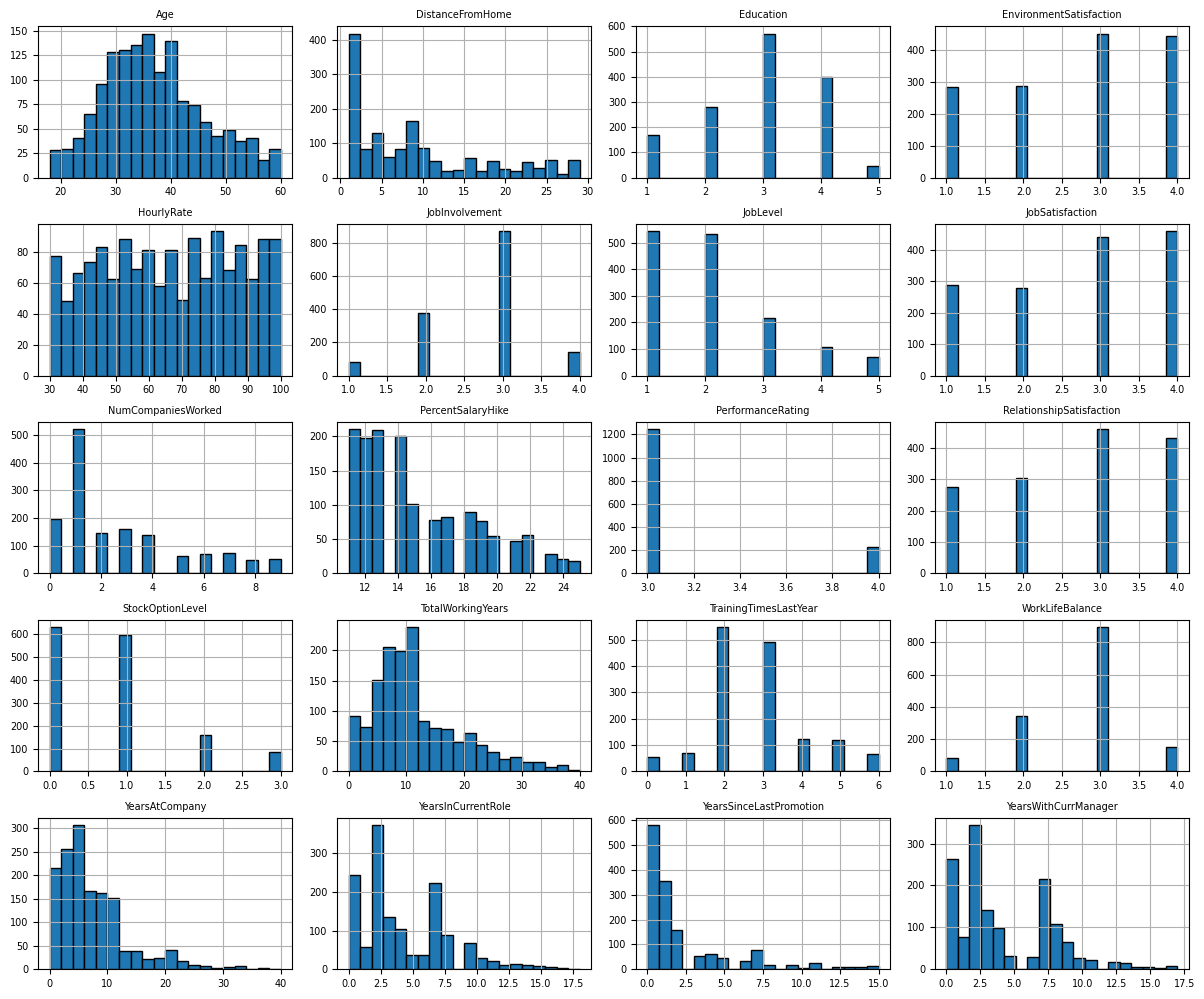

In [32]:
# I really want to visualize the numeric columns
attrition_df[numeric_columns].hist(figsize=(12, 10), bins=20, edgecolor='black')

# Let's be picky with our layout
plt.tight_layout()

# Let's customize the layout
plt.rcParams.update({
    'font.size': 7,
    'axes.titlesize': 7,
    'axes.labelsize': 7,
    'xtick.labelsize': 7,
    'ytick.labelsize': 7
})

plt.show()

In [33]:
# Create y_df with the Attrition and Department columns
y_df = attrition_df[['Attrition','Department']]
y_df.head()

,Attrition,Department
0,Yes,Sales
1,No,Research & Development
2,Yes,Research & Development
3,No,Research & Development
4,No,Research & Development


In [34]:
# I want to look at the names of the Unique Departments
unique_departments = y_df['Department'].unique()
unique_departments


array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [35]:
# Create a list of at least 10 column names to use as X data

# interesting_columns
interesting_columns = ['Education', 'Age', 'DistanceFromHome', 'JobSatisfaction', 'OverTime', 'StockOptionLevel', 'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion', 'NumCompaniesWorked']

# Create X_df using your selected columns
X_df = attrition_df[interesting_columns]
X_df.head()


,Education,Age,DistanceFromHome,JobSatisfaction,OverTime,StockOptionLevel,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,NumCompaniesWorked
0,2,41,1,4,Yes,0,1,6,0,8
1,1,49,8,2,No,1,3,10,1,1
2,2,37,2,3,Yes,0,3,0,0,6
3,4,33,3,3,Yes,0,3,8,3,1
4,1,27,2,2,No,1,3,2,2,9


In [36]:
# Show the data types for X_df
X_df.dtypes

Education                   int64
Age                         int64
DistanceFromHome            int64
JobSatisfaction             int64
OverTime                   object
StockOptionLevel            int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsSinceLastPromotion     int64
NumCompaniesWorked          int64
dtype: object

In [37]:
y_df

,Attrition,Department
0,Yes,Sales
1,No,Research & Development
2,Yes,Research & Development
3,No,Research & Development
4,No,Research & Development
...,...,...
1465,No,Research & Development
1466,No,Research & Development
1467,No,Research & Development
1468,No,Sales


In [38]:
# Split the data into training and testing sets
# Let's define our variable for the Train Test Split function first

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df)

In [39]:
X_train

,Education,Age,DistanceFromHome,JobSatisfaction,OverTime,StockOptionLevel,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,NumCompaniesWorked
1460,4,29,28,1,No,0,1,5,0,1
666,1,22,3,3,Yes,1,4,3,0,0
844,3,30,10,3,No,1,3,10,1,1
1379,3,27,22,2,No,0,3,1,0,1
543,3,44,24,3,No,0,3,5,1,2
...,...,...,...,...,...,...,...,...,...,...
1270,2,34,3,4,No,0,3,2,2,5
282,2,29,2,4,No,0,2,10,0,1
75,4,31,8,4,No,0,3,11,1,1
371,3,29,23,4,No,0,3,3,1,9


In [40]:
# Convert your X data to numeric data types however you see fit
# Add new code cells as necessary

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoder.fit(np.array(X_train['OverTime']).reshape(-1, 1))

X_train['OverTime-encoded'] = encoder.transform(np.array(X_train['OverTime']).reshape(-1, 1))
X_test['OverTime-encoded'] = encoder.transform(np.array(X_test['OverTime']).reshape(-1, 1))

X_train = X_train.drop(columns='OverTime')
X_test = X_test.drop(columns='OverTime')

print(X_train.dtypes)


Education                    int64
Age                          int64
DistanceFromHome             int64
JobSatisfaction              int64
StockOptionLevel             int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
NumCompaniesWorked           int64
OverTime-encoded           float64
dtype: object


In [41]:
# Create a StandardScaler
scaler = StandardScaler()

# Fit the StandardScaler to the training data
scaler.fit(X_train)

# Scale the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [42]:
# Create a OneHotEncoder for the Department column
encoder_department = OneHotEncoder(sparse_output=False)

# Fit the encoder to the training data
encoder_department.fit(np.array(y_train['Department']).reshape(-1, 1))

# Create two new variables by applying the encoder
# to the training and testing data
department_train_encoded = encoder_department.transform(np.array(y_train['Department']).reshape(-1, 1))
department_test_encoded = encoder_department.transform(np.array(y_test['Department']).reshape(-1, 1))


In [43]:
# Create a OneHotEncoder for the Attrition column

encoder_attrition = OneHotEncoder(sparse_output=False)

# Fit the encoder to the training data
encoder_attrition.fit(np.array(y_train['Attrition']).reshape(-1, 1))

# Create two new variables by applying the encoder
# to the training and testing data
attrition_train_encoded = encoder_attrition.transform(np.array(y_train['Attrition']).reshape(-1, 1))
attrition_test_encoded = encoder_attrition.transform(np.array(y_test['Attrition']).reshape(-1, 1))


## Create, Compile, and Train the Model

In [44]:
# Find the number of columns in the X training data
from tensorflow.keras.layers import Input, Dense
num_features = X_train_scaled.shape[1]
print(f"Number of features in X_train: {num_features}")

# Create the input layer
input_layer = Input(shape=(num_features,), name='input')

# Create at least two shared layers
shared_layer_1 = Dense(64, activation='relu', name='shared1')(input_layer)
shared_layer_2 = Dense(128, activation='relu', name='shared2')(shared_layer_1)

Number of features in X_train: 10


In [45]:
# Create a branch for Department
# with a hidden layer and an output layer

# Create the hidden layer
department_hidden = Dense(32, activation='relu', name='department_hidden')(shared_layer_2)

# Create the output layer
department_output = Dense(3, activation='softmax', name='department_output')(department_hidden)


In [46]:
# Create a branch for Attrition
# with a hidden layer and an output layer

# Create the hidden layer
attrition_hidden = Dense(32, activation='relu', name='attrition_hidden')(shared_layer_2)

# Create the output layer
attrition_output = Dense(2, activation='softmax', name='attrition_output')(attrition_hidden)


In [47]:
# Create the model
model = Model(inputs=input_layer, outputs=[department_output, attrition_output])

# Compile the model
model.compile(optimizer='adam', loss={'department_output':'categorical_crossentropy','attrition_output': 'categorical_crossentropy'},metrics={'department_output': 'accuracy','attrition_output': 'accuracy'})

# Summarize the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, 10)        │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ shared1 (Dense)     │ (None, 64)        │        704 │ input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ shared2 (Dense)     │ (None, 128)       │      8,320 │ shared1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ department_hidden   │ (None, 32)        │      4,128 │ shared2[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attrition_hidden    │ (None, 32)        │      4,128 │ shared2[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ department_output   │ (None, 3)         │         99 │ department_hidde… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attrition_output    │ (None, 2)         │         66 │ attrition_hidden… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 17,445 (68.14 KB)

 Trainable params: 17,445 (68.14 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Train the model
history = model.fit(X_train_scaled, {'department_output': department_train_encoded, 'attrition_output': attrition_train_encoded},
    epochs=100,batch_size=32,
    validation_data=(X_test_scaled, {'department_output': department_test_encoded, 'attrition_output': attrition_test_encoded})
)                                                                                                                                                                                       

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - attrition_output_accuracy: 0.6279 - attrition_output_loss: 0.6258 - department_output_accuracy: 0.5571 - department_output_loss: 0.9565 - loss: 1.5830 - val_attrition_output_accuracy: 0.8560 - val_attrition_output_loss: 0.3940 - val_department_output_accuracy: 0.6685 - val_department_output_loss: 0.8185 - val_loss: 1.2159
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - attrition_output_accuracy: 0.8552 - attrition_output_loss: 0.3896 - department_output_accuracy: 0.6724 - department_output_loss: 0.7415 - loss: 1.1312 - val_attrition_output_accuracy: 0.8641 - val_attrition_output_loss: 0.3604 - val_department_output_accuracy: 0.6549 - val_department_output_loss: 0.8267 - val_loss: 1.1875
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - attrition_output_accuracy: 0.8407 - attrition_output_loss: 0.4072 - department_output_accuracy: 0.6590 - department_output_loss: 0.7619 - loss: 1.1691 - val_attrition_output_accuracy: 0.8641 -

In [49]:
# Evaluate the model with the testing data
# Evaluate the model
evaluation_results = model.evaluate(
    X_test_scaled, 
    {'department_output': department_test_encoded, 'attrition_output': attrition_test_encoded}
)

# Display the results
print("\nEvaluation Results:")
print(f"Total Loss: {evaluation_results[0]}")
print(f"Department Loss: {evaluation_results[1]}, Department Accuracy: {evaluation_results[3]}")
print(f"Attrition Loss: {evaluation_results[2]}, Attrition Accuracy: {evaluation_results[4]}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - attrition_output_accuracy: 0.8314 - attrition_output_loss: 1.1639 - department_output_accuracy: 0.5094 - department_output_loss: 2.7672 - loss: 3.9284 

Evaluation Results:
Total Loss: 3.7482664585113525
Department Loss: 2.7233238220214844, Department Accuracy: 0.845108687877655
Attrition Loss: 1.0425432920455933, Attrition Accuracy: 0.510869562625885


In [50]:
# Print the accuracy for both department and attrition
# Evaluate the model on the test data
evaluation_results = model.evaluate(
    X_test_scaled, 
    {'department_output': department_test_encoded, 'attrition_output': attrition_test_encoded},
    verbose=0  # Suppress detailed output
)

# Extract and print the accuracies
department_accuracy = evaluation_results[3]  # Accuracy for department_output
attrition_accuracy = evaluation_results[4]   # Accuracy for attrition_output

print(f"Department Accuracy: {department_accuracy:.2f}")
print(f"Attrition Accuracy: {attrition_accuracy:.2f}")


Department Accuracy: 0.85
Attrition Accuracy: 0.51


# Summary

In the provided space below, briefly answer the following questions.

1. Is accuracy the best metric to use on this data? Why or why not?

2. What activation functions did you choose for your output layers, and why?

3. Can you name a few ways that this model might be improved?

YOUR ANSWERS HERE

1. 


Accuracy can be a useful metric for evaluating this model, but it may not always be the best choice depending on the dataset.

If the dataset is balanced, meaning there are similar proportions of each class, accuracy provides a good overall measure of performance. However, if the dataset is imbalanced, such as significantly more employees in one department or a skewed attrition rate, accuracy can be misleading. In such cases, other metrics like precision, recall, and F1-score offer better insights.

For the attrition prediction, recall is particularly important if the goal is to identify employees likely to leave. For the department prediction, precision may be more relevant to ensure the correct department is recommended with high confidence.

2. 

For the output layers, the softmax activation function was chosen for both branches.

For the department output, softmax is ideal because it is a multi-class classification problem with three classes. Softmax ensures that the model outputs probabilities for each class, with the sum of all probabilities equal to 1, making it easy to identify the most likely department.

For the attrition output, softmax was also used, but with two neurons, as it is a binary classification problem. Although a single neuron with a sigmoid activation could also handle this task, softmax allows the model to output probabilities for both classes simultaneously, which can be useful for certain applications.

3. 

There are several ways to improve this model. 

First, hyperparameter tuning can be performed to optimize factors like learning rate, the number of neurons, or the number of layers to better balance underfitting and overfitting. Additionally, regularization techniques, such as Dropout or L2 regularization, can be added to prevent overfitting and improve generalization. Another potential improvement is feature engineering, which involves creating new, meaningful features or selecting the most relevant ones to enhance the model's predictive power.

If the dataset is imbalanced, techniques like oversampling, undersampling, or using class weights can ensure the model pays appropriate attention to all classes.

Lastly, exploring advanced architectures, such as ensemble models or transfer learning, and evaluating performance using metrics like precision, recall, and F1-score could further refine the model’s effectiveness.